In [27]:
import nltk
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score


In [29]:
reviews = [
    "This product is amazing!",
    "I hate this product.",
    "Best purchase ever!",
    "Worst product I've used.",
    "Fantastic quality!",
    "Not worth the money.",
    "I love it!",
    "Terrible experience.",
    "Would definitely recommend!",
    "Will not buy again."
]
labels = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

In [30]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
vectorizer = TfidfVectorizer(stop_words=list(stop_words)) 
X = vectorizer.fit_transform(reviews)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anany\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.25, random_state=42)

In [33]:
model = MultinomialNB()


In [34]:
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]  # Smoothing parameter for Naive Bayes
}

grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]},
             scoring='accuracy')

In [35]:
best_model = grid_search.best_estimator_

In [36]:
predictions = best_model.predict(X_test)

In [37]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, predictions))


Accuracy: 0.33

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3



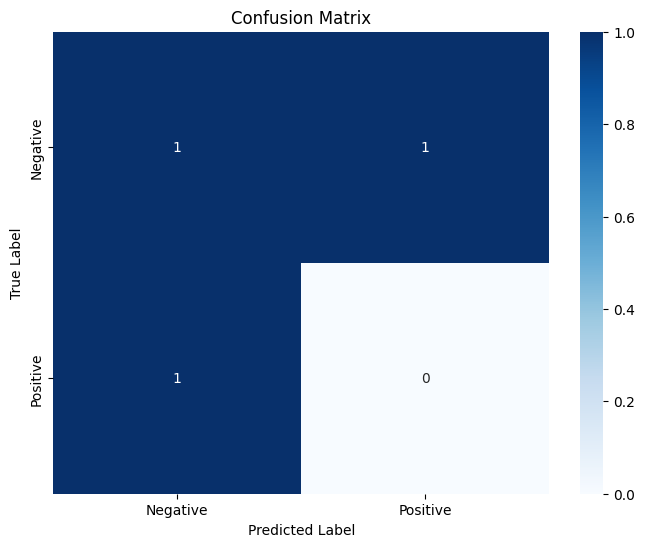

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
